### **j(w0, w1) = -2 + 3x + epsilon**
#### **j(w0, w1) = w0 + w1x + epsilon**

In [38]:
x = [5, 3, -1, 2, 6]

In [39]:
y = [14, 6, -5.5, 3.5, 18]

In [40]:
n = len(x)
X, Y = 0, 0
for i in range(n):
    X = X + x[i]
    Y = Y + y[i]
print(n, X, Y)

5 15 36.0


In [41]:
XiYi, Xi2 = 0, 0
for i in range(n):
    XiYi = XiYi + x[i] * y[i]
    Xi2 = Xi2 + x[i] * x[i]
print(XiYi, Xi2)

208.5 75


In [42]:
w1 = (n * XiYi - X * Y) / (n * Xi2 - X**2)
print(w1)

3.35


In [43]:
w0 = (Y - w1 * X) / n
print(w0)

-2.85


### **AI code**

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

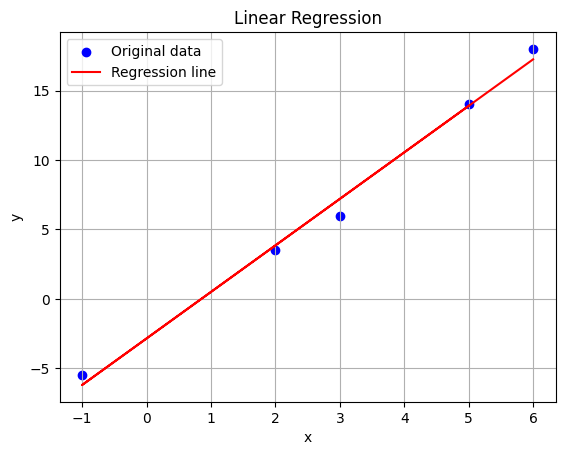

In [45]:
x = [5, 3, -1, 2, 6]
y = [14, 6, -5.5, 3.5, 18]

X = np.array(x).reshape(-1, 1)
Y = np.array(y)

model = LinearRegression()
model.fit(X, Y)

y_pred = model.predict(X)

plt.scatter(x, y, color="blue", label="Original data")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

### **Video code**

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

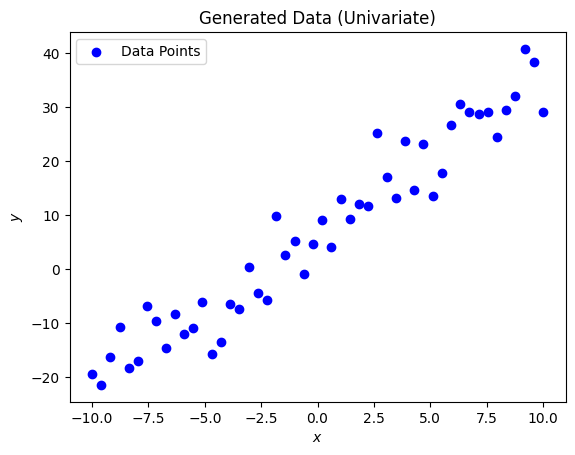

In [48]:
X, y = generate_data(n=50, noise=5.0)
plt.scatter(X, y, color="blue", label="Data Points")
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [49]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x


# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[
        np.ones((len(X), 1)), X
    ]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w


# Get parameter vector w
w = linear_regression_closed_form(X, y)
print("Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 2.86, w_0 = 6.87


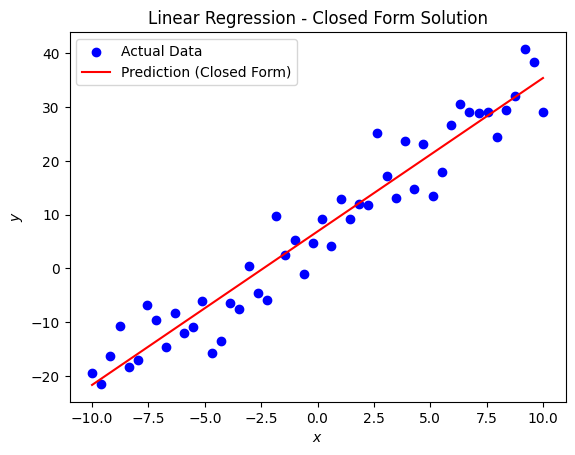

In [50]:
y_pred = h_w(X, w)

plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Prediction (Closed Form)")
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()